In [22]:
# Importing the dependencies
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Loading the data into the tensorflow dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory("data", batch_size=32, image_size=(256, 256), shuffle=True)
class_names = dataset.class_names


print("Class names are : ",class_names)
print(f"Our data is in total : {len(dataset)} batches")

Found 4710 files belonging to 2 classes.
Class names are :  ['Apple___Cedar_apple_rust', 'Apple___healthy']
Our data is in total : 148 batches


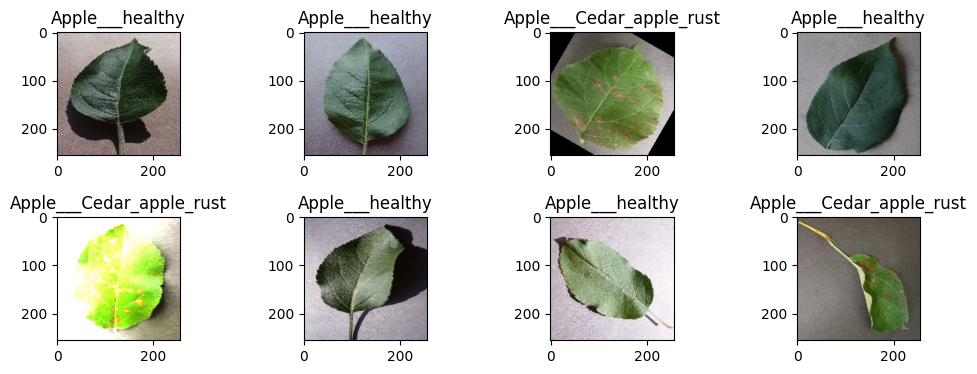

In [44]:
# Let's visualize one of the image from the batch
fig, ax = plt.subplots(2,4,figsize=(12, 4))

# Printing 8 images from the first batch of the dataset
for img_batch, label_batch in dataset.take(1):

    for i in range(2):
        for j in range(4):
            ax[i, j].set_title(class_names[label_batch[i * 4 + j]])
            ax[i, j].imshow(img_batch[i * 4 + j].numpy().astype("uint8"))

# Adjusting the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [61]:
# training size, validation size, shuffle size
training_size = 0.8
validation_size = 0.1
shuffle_size = 10000

# Function for creating test, train and validation data batches
def train_test_val_batches(dataset, training_size, validation_size, shuffle_size):

    # Shuffling the dataset
    dataset = dataset.shuffle(shuffle_size, seed=12)

    # Creating batches for train, test, and validation
    train_dataset = dataset.take(int(len(dataset) * training_size))
    test_dataset = dataset.skip(int(len(dataset) * training_size))
    validation_dataset = test_dataset.take(int(len(test_dataset) * validation_size))

    # Cache, Shuffle, and Prefetch the Datasets
    train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

    return train_dataset, test_dataset, validation_dataset


# Calling the function
train_ds, test_ds, val_ds = train_test_val_batches(dataset, training_size, validation_size, shuffle_size)
